# Preprocessing the data
Data preprocessing transforms the data into a format that will be more easily and effectively processed with the data mining techniques and tools

### Importing necessary libraries

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,RobustScaler
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

### Loading the flow data set
Showing the value of the flow with hourly mean

In [2]:
flow = pd.read_csv('../dataset/flow1.csv', parse_dates={'hour':['time']},index_col='hour')
dayfirst=True
flow = flow.resample('60T').mean()

In [3]:
flow = flow.reset_index()

In [4]:
flow['time'] = flow['hour']
flow.head()

,hour,flow,time
0,2015-06-01 14:00:00,113.754443,2015-06-01 14:00:00
1,2015-06-01 15:00:00,113.013333,2015-06-01 15:00:00
2,2015-06-01 16:00:00,114.081666,2015-06-01 16:00:00
3,2015-06-01 17:00:00,116.459167,2015-06-01 17:00:00
4,2015-06-01 18:00:00,123.825000,2015-06-01 18:00:00


In [5]:
flow['hour'] = (flow['hour'].dt.hour)

In [6]:
flow.head()

,hour,flow,time
0,14,113.754443,2015-06-01 14:00:00
1,15,113.013333,2015-06-01 15:00:00
2,16,114.081666,2015-06-01 16:00:00
3,17,116.459167,2015-06-01 17:00:00
4,18,123.825000,2015-06-01 18:00:00


### Loading the rainfall data set

In [7]:
rainfall_set = pd.read_csv('../dataset/rainfall1.csv', parse_dates={'hour':['time']},index_col='hour')
dayfirst=True
rainfall_set = rainfall_set.resample('60T').mean()

In [8]:
rainfall_set = rainfall_set.reset_index()

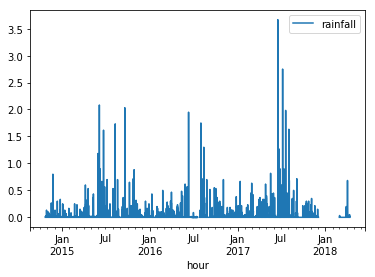

In [9]:
rainfall_set.set_index(['hour']).plot()
plt.show()

In [10]:
rainfall_set = rainfall_set.reset_index()

#### Giving the range of the data '2015-06-01' - '2017-11-10'

In [11]:
rainfall_set = rainfall_set[(rainfall_set['hour'] > '2015-06-01') & (rainfall_set['hour'] <= '2017-11-10')]

In [12]:
rainfall_set = rainfall_set.drop('index', axis=1)

In [13]:
rainfall_set.columns = ['time','rainfall']

### Merging two data sets into one 
Merging is based on time column

In [14]:
flow = pd.merge(flow, rainfall_set, how='left', on='time')

In [15]:
flow.head()

,hour,flow,time,rainfall
0,14,113.754443,2015-06-01 14:00:00,0.000000
1,15,113.013333,2015-06-01 15:00:00,0.000000
2,16,114.081666,2015-06-01 16:00:00,0.000000
3,17,116.459167,2015-06-01 17:00:00,0.016667
4,18,123.825000,2015-06-01 18:00:00,0.000000


### Adding the feature of previous hour's flow value

In [16]:
flow['previous-hour'] = flow['flow'].shift(1)

In [17]:
flow.head()

,hour,flow,time,rainfall,previous-hour
0,14,113.754443,2015-06-01 14:00:00,0.000000,NaN
1,15,113.013333,2015-06-01 15:00:00,0.000000,113.754443
2,16,114.081666,2015-06-01 16:00:00,0.000000,113.013333
3,17,116.459167,2015-06-01 17:00:00,0.016667,114.081666
4,18,123.825000,2015-06-01 18:00:00,0.000000,116.459167


### Filling the missing values with the mean of the data

In [18]:
flow = flow.fillna(flow.mean())

## Using different techniques for data preparation

### Standardization (or Z-score normalization)
properties of a standard normal distribution with μ=0 and σ=1

In [19]:
flow['zscore-flow'] = zscore(flow['flow'])
flow['zscore-prev-hour'] = zscore(flow['previous-hour'])
flow['zscore-rain'] = zscore(flow['rainfall'])

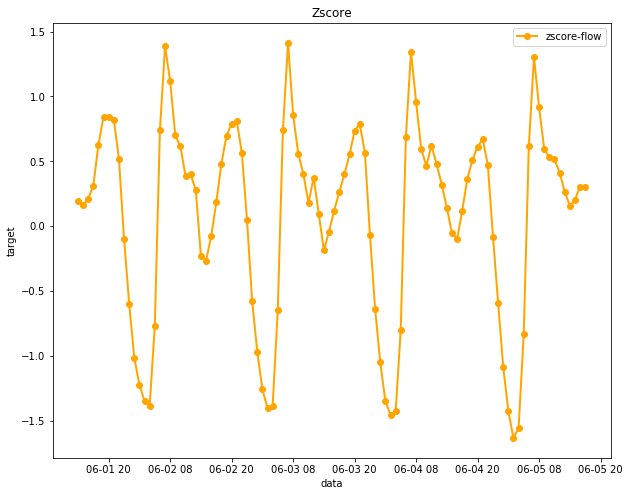

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(flow['time'][:100],flow['zscore-flow'][:100], color="orange", marker="o", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Zscore")
plt.legend()
plt.show()

### Min-Max Scaler
This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one

In [73]:
scaler = MinMaxScaler()
flow['min-max'] = scaler.fit_transform(flow[['flow']])
flow['min-max-rain'] = scaler.fit_transform(flow[['rainfall']])

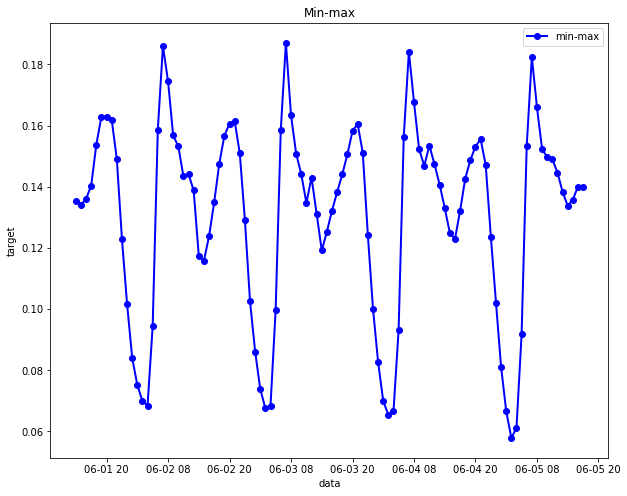

In [74]:
plt.figure(figsize=(10, 8))
plt.plot(flow['time'][:100],flow['min-max'][:100], color="blue", marker="o", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Min-max")
plt.legend()
plt.show()

### Robust scaler
Scale features using statistics that are robust to outliers

In [88]:
robust_scaler = RobustScaler()
rob = robust_scaler.fit_transform(flow[['flow']])
flow['robust'] = robust_scaler.transform(flow[['flow']])
flow['robust-rain'] = robust_scaler.transform(flow[['rainfall']])

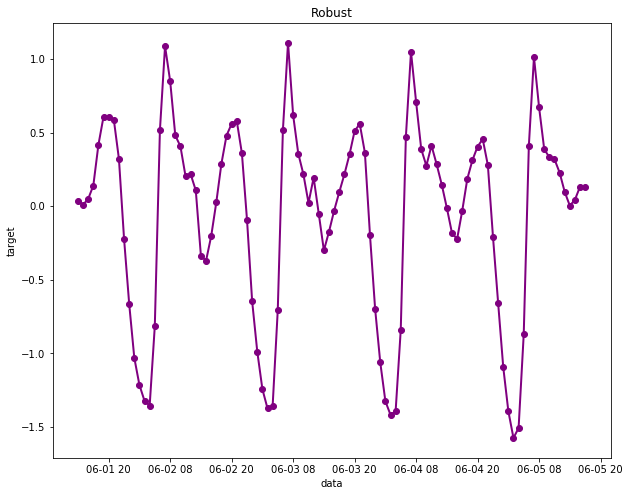

In [89]:
plt.figure(figsize=(10, 8))
plt.plot(flow['time'][:100],flow['robust'][:100], color="purple", marker="o", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Robust")
plt.show()

### Comparing different methods of data preprocessing

In [90]:
flow.head()

,hour,flow,time,rainfall,previous-hour,zscore-flow,zscore-prev-hour,zscore-rain,min-max,robust,min-max-rain,robust-rain
0,14,113.754443,2015-06-01 14:00:00,0.000000,109.165265,0.196712,4.263896e-14,-0.131098,0.135434,0.037612,0.000000,-4.261227
1,15,113.013333,2015-06-01 15:00:00,0.000000,113.754443,0.164946,1.967086e-01,-0.131098,0.134087,0.009605,0.000000,-4.261227
2,16,114.081666,2015-06-01 16:00:00,0.000000,113.013333,0.210738,1.649419e-01,-0.131098,0.136029,0.049978,0.000000,-4.261227
3,17,116.459167,2015-06-01 17:00:00,0.016667,114.081666,0.312647,2.107345e-01,0.123408,0.140350,0.139825,0.004545,-4.260597
4,18,123.825000,2015-06-01 18:00:00,0.000000,116.459167,0.628372,3.126427e-01,-0.131098,0.153740,0.418184,0.000000,-4.261227


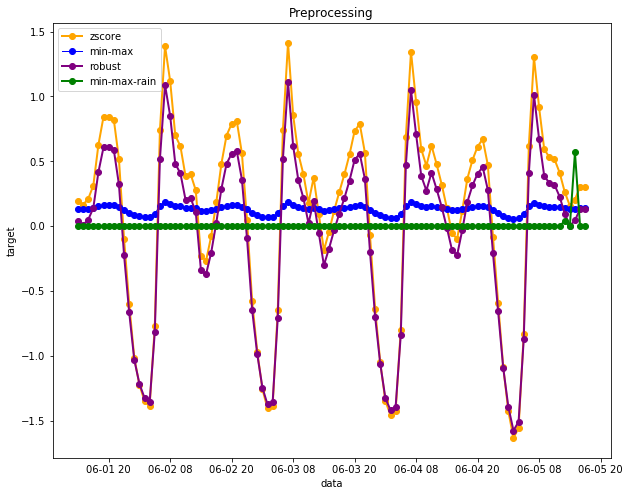

In [86]:
plt.figure(figsize=(10, 8))
plt.plot(flow['time'][:100],flow['zscore-flow'][:100], color="orange", marker="o",label="zscore", linewidth=2)
plt.plot(flow['time'][:100],flow['min-max'][:100], color="blue", marker="o",label="min-max", linewidth=1)
plt.plot(flow['time'][:100],flow['robust'][:100], color="purple", marker="o",label="robust", linewidth=2)
plt.plot(flow['time'][:100],flow['min-max-rain'][:100], color="green", marker="o",label="min-max-rain", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Preprocessing")
plt.legend()
plt.show()

### Tree regression on two features after applying zscore method

In [78]:
split_date = pd.datetime(2016,12,31,23,59)

flow_training = flow.loc[flow['time'] <= split_date]
flow_test = flow.loc[flow['time'] > split_date]

flow_training = flow_training.fillna(flow_training.mean())
flow_test = flow_test.fillna(flow_test.mean())

In [79]:
X_flow_training = flow_training[['hour','zscore-prev-hour', 'min-max-rain']]
Y_flow_training = flow_training['flow']
X_flow_test = flow_test[['hour','zscore-prev-hour','min-max-rain']]
Y_flow_test = flow_test['flow']

### Creating a multiple regression model with decision tree

In [80]:
regressor = DecisionTreeRegressor()
regressor.fit(X_flow_training, Y_flow_training)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [81]:
predict = regressor.predict(X_flow_test)

### Plot of the fragment of the model showing only the hour

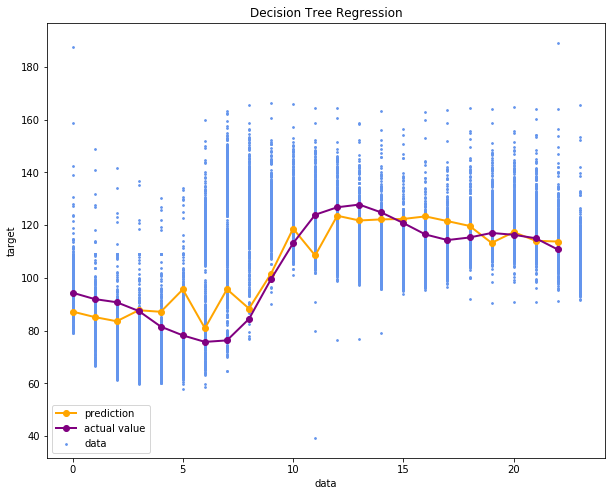

In [82]:
plt.figure(figsize=(10, 8))
plt.scatter(X_flow_training['hour'], Y_flow_training, s=3, 
            c="cornflowerblue", label="data")
plt.plot(X_flow_test['hour'][:23], predict[:23], color="orange",
         marker="o",label="prediction", linewidth=2)
plt.plot(X_flow_test['hour'][:23],Y_flow_test[:23], c='purple',marker="o", label="actual value",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### MAPE and feature importance for tree regression for three features

In [91]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
0,0.667725
1,0.326624
2,0.005651


In [92]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [93]:
mape_tree = mean_absolute_percentage_error(Y_flow_test, predict)
mape_tree

3.825831252089693